In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data load chestunnam
file_path = r'D:\RoadSafe_Analytics\data\US_Accidents_Cleaned_Final.csv'
df = pd.read_csv(file_path)

# Empty coordinates unte remove chestunnam (plotting error rakunda)
df = df.dropna(subset=['Start_Lat', 'Start_Lng'])

print("✔ Step 1 Complete: Data loaded successfully!")
print(f"Dataset Size: {df.shape}")

✔ Step 1 Complete: Data loaded successfully!
Dataset Size: (500000, 47)


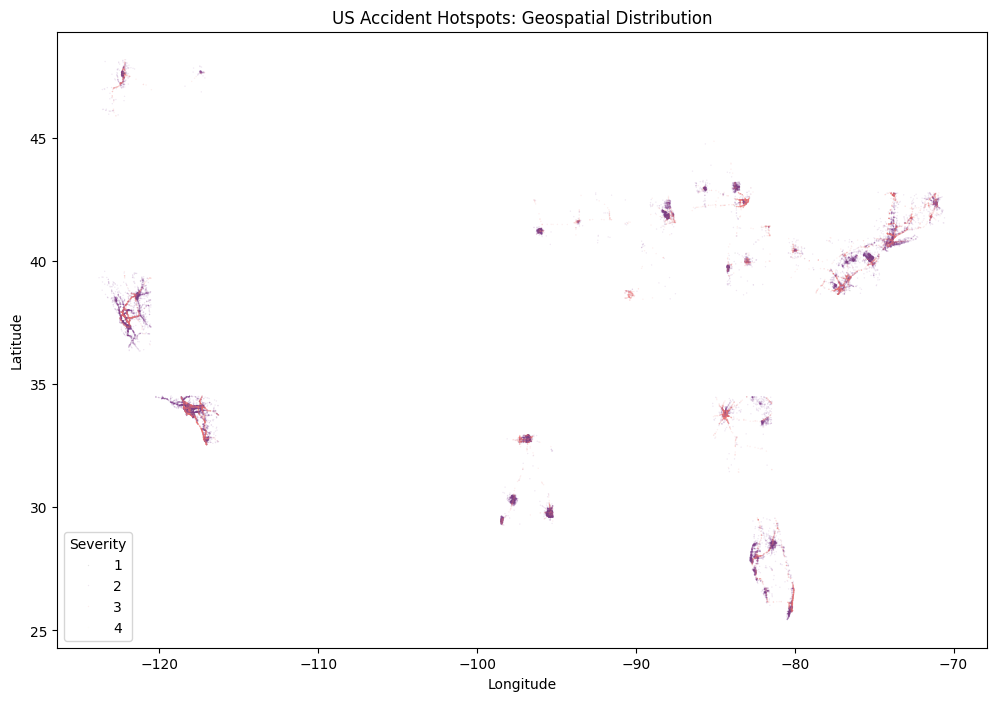

In [2]:
plt.figure(figsize=(12, 8))

# Data peddadhi kabatti 10% sample teeskuntunnam
sample_df = df.sample(frac=0.1, random_state=42)

# Scatter plot to identify high-density zones
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=sample_df, hue='Severity', 
                palette='magma', s=1, alpha=0.1)

plt.title('US Accident Hotspots: Geospatial Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Severity', loc='lower left')
plt.show()

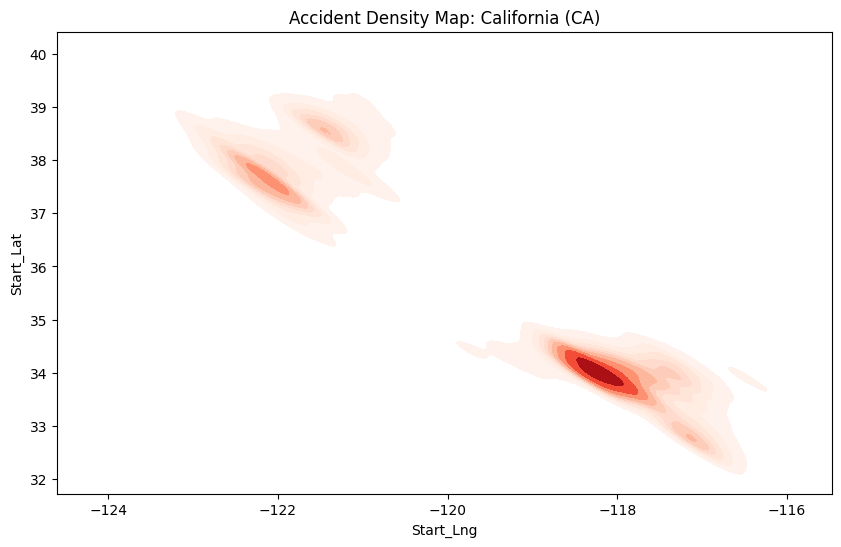

C:\Users\pooja\AppData\Local\Temp\ipykernel_16556\3139297335.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_states.index, y=top_5_states.values, palette="viridis")


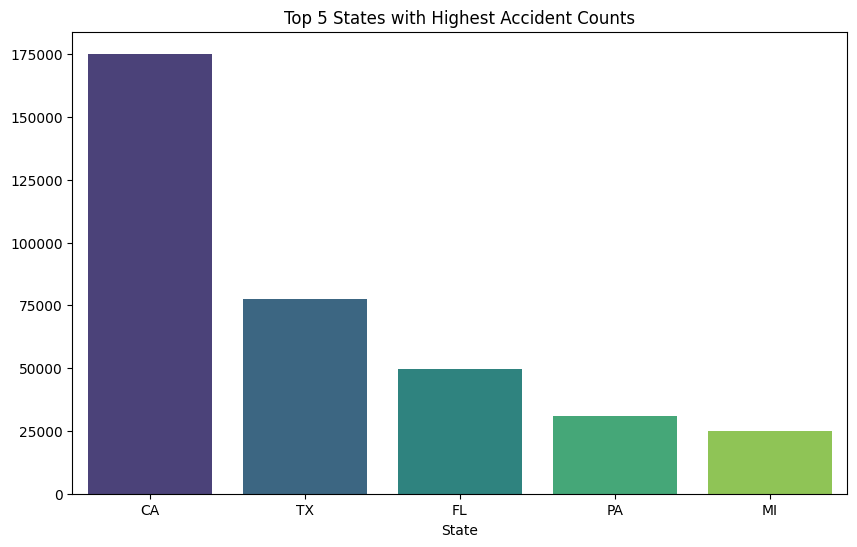

Top 5 Cities with Highest Accidents:
 City
Houston        26484
Los Angeles    18827
Austin         18528
Dallas         17365
Atlanta         9389
Name: count, dtype: int64


In [3]:
#Regional Density and Top 5 Rankings
# 3a. California (CA) State Density Map
state_df = df[df['State'] == 'CA']
plt.figure(figsize=(10, 6))
sns.kdeplot(x=state_df['Start_Lng'], y=state_df['Start_Lat'], 
            cmap="Reds", fill=True, thresh=0.05, levels=10)
plt.title('Accident Density Map: California (CA)')
plt.show()

# 3b. Top 5 Accident-Prone States
top_5_states = df['State'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_states.index, y=top_5_states.values, palette="viridis")
plt.title('Top 5 States with Highest Accident Counts')
plt.show()

print("Top 5 Cities with Highest Accidents:\n", df['City'].value_counts().head(5))